<h1>NetworkX Demo</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
basedir = '../'
sys.path.append(basedir)

import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt

from IPython.display import display
from lda_for_fragments import Ms2Lda

In [2]:
ms2lda = Ms2Lda.resume_from('results/Manuscript_Beer3POSmode_EFassignerALL.project')

Project loaded from results/Manuscript_Beer3POSmode_EFassignerALL.project time taken = 21.7165329456
 - input_filenames = 
	../input/manuscript/Beer3pos_MS1filter_Method3_fragments.csv
	../input/manuscript/Beer3pos_MS1filter_Method3_losses.csv
	../input/manuscript/Beer3pos_MS1filter_Method3_ms1.csv
	../input/manuscript/Beer3pos_MS1filter_Method3_ms2.csv
 - df.shape = (1422, 4496)
 - K = 300
 - alpha = 0.166666666667
 - beta = 0.1
 - number of samples stored = 1
 - last_saved_timestamp = 11/11/15 23:39:09
 - message = Beer3Pos analysis for the manuscript with EFassigner EF assignments for ms1, fragments, and losses


In [3]:
ms2lda.do_thresholding(th_doc_topic=0.05, th_topic_word=0.01)

In [6]:
interesting = ['motif_241', 'motif_19']
G, json_data = ms2lda.get_network_graph(selected_motifs=interesting)

18, motif_100 degree=4 removed
30, motif_108 degree=4 removed
32, motif_109 degree=5 removed
53, motif_127 degree=14 removed
54, motif_124 degree=4 removed
56, motif_122 degree=8 removed
57, motif_123 degree=9 removed
58, motif_120 degree=5 removed
88, motif_274 degree=4 removed
90, motif_272 degree=12 removed
91, motif_273 degree=14 removed
93, motif_271 degree=4 removed
97, motif_279 degree=2 removed
132, motif_99 degree=4 removed
134, motif_97 degree=31 removed
136, motif_95 degree=8 removed
137, motif_94 degree=3 removed
138, motif_93 degree=4 removed
139, motif_92 degree=12 removed
141, motif_90 degree=12 removed
149, motif_178 degree=2 removed
155, motif_277 degree=3 removed
157, motif_77 degree=19 removed
189, motif_113 degree=10 removed
190, motif_112 degree=8 removed
192, motif_110 degree=3 removed
194, motif_116 degree=8 removed
195, motif_115 degree=28 removed
196, motif_114 degree=2 removed
197, motif_119 degree=8 removed
198, motif_118 degree=3 removed
215, motif_249 degre

In [22]:
print nx.info(G)

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 32
Average degree:   1.8824


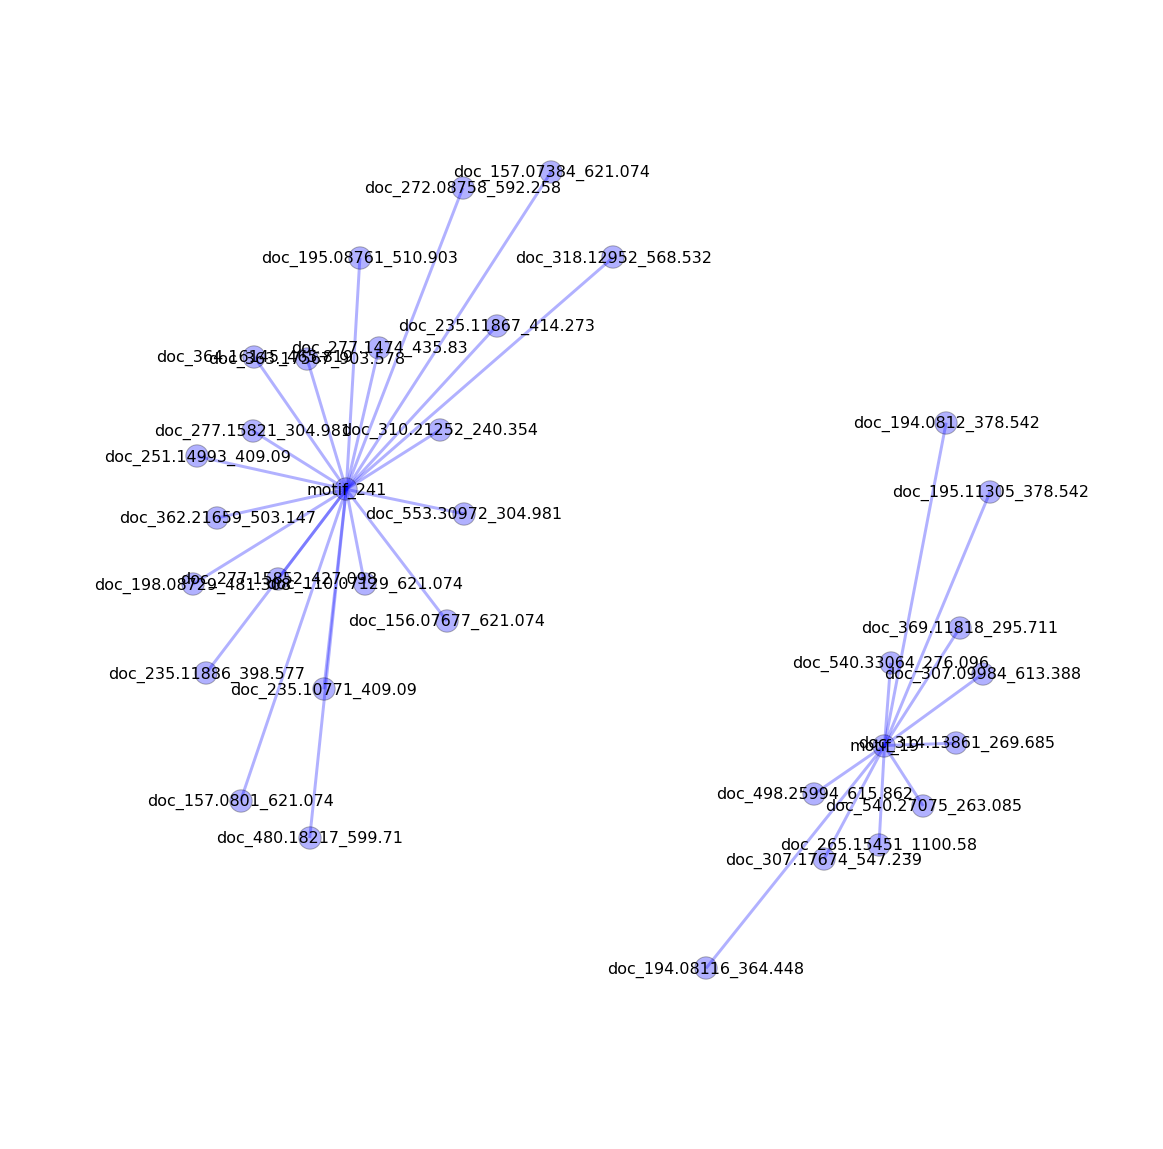

In [55]:
plt.figure(figsize=(20, 20), dpi=80)
plt.axis('off')
fig = plt.figure(1)

pos = nx.spring_layout(G, k=0.08)
nx.draw_networkx_nodes(G, pos, node_size=500, alpha=0.3, node_color='blue')
nx.draw_networkx_edges(G, pos, width=3, alpha=0.3, edge_color='blue')

labels = dict((n, d['name']) for n, d in G.nodes(data=True))
labels = nx.draw_networkx_labels(G, pos, labels=labels, font_size=16, font_family='sans-serif')

In [13]:
for n in topic_nodes:

    # print out the topic
    node_id = n[0]
    node_data = n[1]    
    print str(node_id) + '\t' + str(node_data['name'])
    
    # print the documents connected to each topic    
    neighbours = G.neighbors(node_id)
    neighbours_pid = []
    for nb in neighbours:
        pid = int(G.node[nb]['peakid'])
        neighbours_pid.append(pid)
    rows = ms2lda.ms1.loc[ms2lda.ms1['peakID'].isin(neighbours_pid)]
    display(rows)
    
    print

219	motif_241


,peakID,MSnParentPeakID,msLevel,rt,mz,intensity,Sample,GroupPeakMSn,CollisionEnergy,annotation
449,449,0,1,621.074,110.071292,5.439790e+06,1,0,0,C5H8N3
4779,4779,0,1,621.074,156.076767,1.100440e+08,1,0,0,C6H10O2N3
4839,4839,0,1,621.074,157.073835,1.278002e+06,1,0,0,NaN
4864,4864,0,1,621.074,157.080101,7.317130e+06,1,0,0,C5H10O2N3[C13]
9236,9236,0,1,510.903,195.087613,1.369506e+06,1,0,0,C8H19OS2
9533,9533,0,1,481.308,198.087292,1.177985e+06,1,0,0,C8H12O3N3
14424,14424,0,1,409.090,235.107715,8.443007e+05,1,0,0,C12H15O3N2
14469,14469,0,1,414.273,235.118674,4.018598e+07,1,0,0,C11H23OS2
14514,14514,0,1,398.577,235.118859,2.509060e+06,1,0,0,C11H23OS2
16731,16731,0,1,409.090,251.149931,2.320696e+06,1,0,0,C12H27OS2



855	motif_19


,peakID,MSnParentPeakID,msLevel,rt,mz,intensity,Sample,GroupPeakMSn,CollisionEnergy,annotation
9034,9034,0,1,364.448,194.081159,4002022.2500,1,0,0,C10H12O3N
9071,9071,0,1,378.542,194.081202,2941392.2500,1,0,0,C10H12O3N
9259,9259,0,1,378.542,195.113046,612365.6250,1,0,0,C10H15O2N2
18337,18337,0,1,1100.580,265.154506,641240.3750,1,0,0,C14H21O3N2
23984,23984,0,1,613.388,307.099839,1956959.8750,1,0,0,C18H16ON2P
24157,24157,0,1,547.239,307.176740,1265813.8750,1,0,0,C15H31O2S2
25054,25054,0,1,269.685,314.138614,880273.1250,1,0,0,C10H24O6N3S
30232,30232,0,1,295.711,369.118176,577575.9375,1,0,0,C14H23N6P2S
33376,33376,0,1,615.862,498.259936,2480739.0000,1,0,0,NaN
33815,33815,0,1,263.085,540.270748,7450965.5000,1,0,0,NaN
